In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from sklearn.decomposition import PCA

In [ ]:
#Reading the input files
train=[]
train_label=[]
path=r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Assignment-3\Data\\"
for i in os.listdir(path+"train") :
  for j in os.listdir(path+"train\\"+i):
    train.append(cv2.imread(path+"train\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    train_label.append(int(i))
train=np.array(train)
train_label=np.array(train_label)

test=[]
test_label=[]
for i in os.listdir(path+"test") :
  for j in os.listdir(path+"test\\"+i):
    test.append(cv2.imread(path+"test\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    test_label.append(int(i))
test=np.array(test)
test_label=np.array(test_label)

validation=[]
validation_label=[]
for i in os.listdir(path+"val") :
  for j in os.listdir(path+"val\\"+i):
    validation.append(cv2.imread(path+"val\\"+i+"\\"+j, cv2.IMREAD_GRAYSCALE))
    validation_label.append(int(i))
validation=np.array(validation)
validation_label=np.array(validation_label)

In [ ]:
# Flattening the Input images
train1 = train.reshape(train.shape[0], -1)
validation1 = validation.reshape(validation.shape[0],-1)
test1 = test.reshape(test.shape[0],-1)

#Normalizing
train2 = train1.astype('float32') / 255
validation2 = validation1.astype('float32') / 255
test2 = test1.astype('float32') / 255

# Subtracting the mean

training_mean = np.mean(train2 , axis=0)
train2 -= training_mean
validation2 -= training_mean
test2 -= training_mean

In [ ]:
# model1.save(r'C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Assignment-4\\')


In [6]:
def PCA_Analysis(Dimension,i,j,k):
    pca = PCA(Dimension)
    pca.fit(train2)
    X_train = pca.transform(train2)
    X_val = pca.transform(validation2)
    X_test = pca.transform(test2)

    print(f"\nDimensions Reduced to {Dimension} \n")
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=68)

    model1 = tf.keras.models.Sequential([
        tf.keras.Input(Dimension,name='Input_layer'),
        tf.keras.layers.Dense(i, activation='tanh',kernel_initializer=initializer,name='Hidden_layer-1'),
        tf.keras.layers.Dense(j, activation='tanh',kernel_initializer=initializer,name='Hidden_Layer-2'),
        tf.keras.layers.Dense(k, activation='tanh',kernel_initializer=initializer,name='Hidden_layer-3'),
        tf.keras.layers.Dense(10, activation='softmax',kernel_initializer=initializer,name='Output_layer')
    ])

    optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,name='Adam')
    model1.compile(optimizer=optimizer1,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    Callback = tf.keras.callbacks.EarlyStopping(monitor='loss',min_delta=0.0001,patience=1)
    predictions1 = model1.fit(X_train, train_label, epochs=10000, batch_size=1, callbacks=Callback)

    plt.plot(predictions1.history['loss'])
    plt.title(f"{Dimension} Dimension Reduction")
    plt.xlabel("Epochs")
    plt.ylabel("Average error")
    plt.show()

    _ , _ = model1.evaluate(X_train, train_label)
    _ , _ = model1.evaluate(X_val, validation_label)
    _ , _ = model1.evaluate(X_test, test_label)

    Predict = model1.predict(X_test, verbose=1)
    predictions = np.argmax(Predict, axis=1)
    cm = tf.math.confusion_matrix(test_label, predictions)
    
    print(cm)


Dimensions Reduced to 32 

Epoch 1/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.2754 - accuracy: 0.9319
Epoch 2/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.1334 - accuracy: 0.9590
Epoch 3/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.1041 - accuracy: 0.9697
Epoch 4/10000
11385/11385 [==============================] - 22s 2ms/step - loss: 0.0773 - accuracy: 0.9764
Epoch 5/10000
11385/11385 [==============================] - 29s 3ms/step - loss: 0.0633 - accuracy: 0.9809
Epoch 6/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.0523 - accuracy: 0.9832
Epoch 7/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.0453 - accuracy: 0.9859
Epoch 8/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 9/10000
11385/11385 [==============================] - 40s 4ms/step - loss: 0.0273 - accuracy: 0.9922


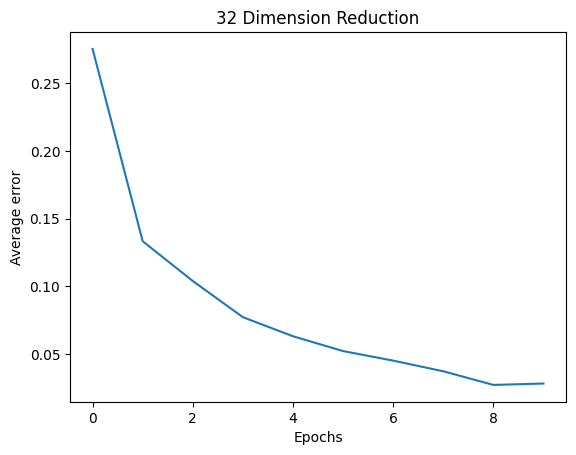

119/119 [==============================] - 0s 3ms/step
tf.Tensor(
[[752   0   4   3   0   0   0   0]
 [  1 748   4   2   0   0   0   4]
 [  5   2 730  12   0   0   0  10]
 [  3   2   6 741   0   0   0   7]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  2   3   8   5   0   0   0 741]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 64 

Epoch 1/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.2452 - accuracy: 0.9416
Epoch 2/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.1241 - accuracy: 0.9643
Epoch 3/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.0887 - accuracy: 0.9742
Epoch 4/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.0683 - accuracy: 0.9809
Epoch 5/10000
11385/11385 [==============================] - 23s 2ms/step - loss: 0.0492 - accuracy: 0.9849
Epoch 6/10000
11385/11385 [==============================

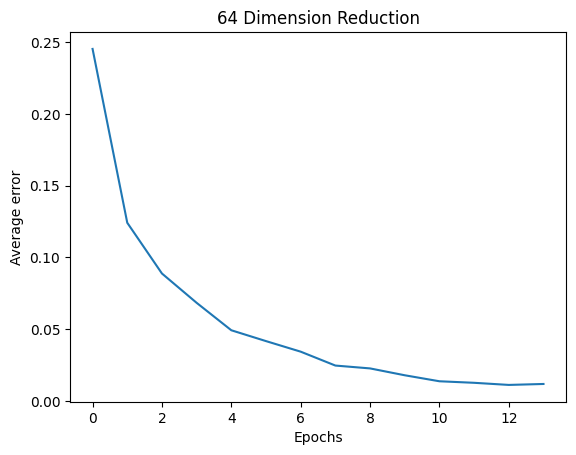

119/119 [==============================] - 0s 1ms/step
tf.Tensor(
[[751   3   3   1   0   0   0   1]
 [  1 744   2   3   0   0   0   9]
 [  3   2 737   9   0   0   0   8]
 [  5   2   7 738   0   0   0   7]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  2   3  10   2   0   0   0 742]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 128 

Epoch 1/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.2779 - accuracy: 0.9313
Epoch 2/10000
11385/11385 [==============================] - 23s 2ms/step - loss: 0.1339 - accuracy: 0.9635
Epoch 3/10000
11385/11385 [==============================] - 20s 2ms/step - loss: 0.0972 - accuracy: 0.9722
Epoch 4/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.0642 - accuracy: 0.9824
Epoch 5/10000
11385/11385 [==============================] - 25s 2ms/step - loss: 0.0473 - accuracy: 0.9860
Epoch 6/10000
11385/11385 [=============================

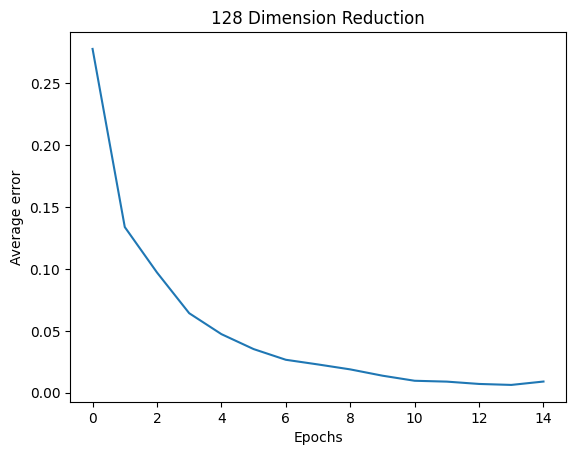

119/119 [==============================] - 0s 1ms/step
tf.Tensor(
[[751   0   4   2   0   0   0   2]
 [  0 753   4   1   0   0   0   1]
 [  3   7 736   9   0   0   0   4]
 [  5   8   4 736   0   0   0   6]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  3   6  13   5   0   0   0 732]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 256 

Epoch 1/10000
11385/11385 [==============================] - 37s 3ms/step - loss: 0.2813 - accuracy: 0.9296
Epoch 2/10000
11385/11385 [==============================] - 23s 2ms/step - loss: 0.1206 - accuracy: 0.9668
Epoch 3/10000
11385/11385 [==============================] - 18s 2ms/step - loss: 0.0804 - accuracy: 0.9768
Epoch 4/10000
11385/11385 [==============================] - 19s 2ms/step - loss: 0.0579 - accuracy: 0.9830
Epoch 5/10000
11385/11385 [==============================] - 19s 2ms/step - loss: 0.0408 - accuracy: 0.9874
Epoch 6/10000
11385/11385 [=============================

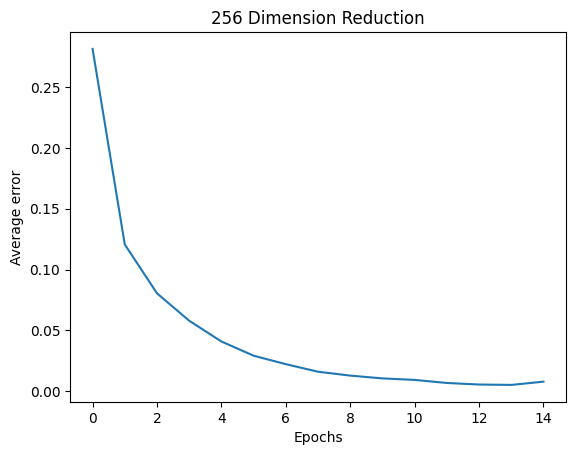

119/119 [==============================] - 0s 1ms/step
tf.Tensor(
[[751   0   4   4   0   0   0   0]
 [  1 750   3   3   0   0   0   2]
 [  7   5 726  13   0   0   0   8]
 [  3   5  10 737   0   0   0   4]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  5   3  10   1   0   0   0 740]], shape=(8, 8), dtype=int32)


In [7]:
for i in [32,64,128,256]:
    PCA_Analysis(i,64,32,16)



Dimensions Reduced to 32 

Epoch 1/10000
11385/11385 [==============================] - 17s 1ms/step - loss: 0.3173 - accuracy: 0.9232
Epoch 2/10000
11385/11385 [==============================] - 19s 2ms/step - loss: 0.1424 - accuracy: 0.9618
Epoch 3/10000
11385/11385 [==============================] - 29s 3ms/step - loss: 0.1074 - accuracy: 0.9691
Epoch 4/10000
11385/11385 [==============================] - 26s 2ms/step - loss: 0.0861 - accuracy: 0.9760
Epoch 5/10000
11385/11385 [==============================] - 23s 2ms/step - loss: 0.0706 - accuracy: 0.9794
Epoch 6/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 7/10000
11385/11385 [==============================] - 22s 2ms/step - loss: 0.0518 - accuracy: 0.9838
Epoch 8/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.0444 - accuracy: 0.9862
Epoch 9/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.0388 - accuracy: 0.9882


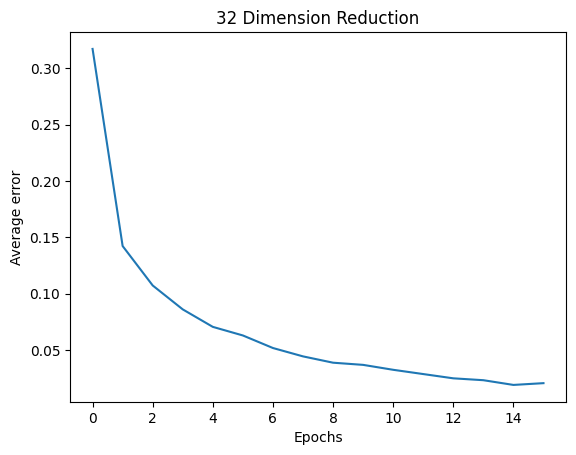

119/119 [==============================] - 0s 3ms/step
tf.Tensor(
[[747   0  10   1   0   0   0   1]
 [  0 750   4   2   0   0   0   3]
 [  7   9 726  12   0   0   0   5]
 [ 10   1   9 735   0   0   0   4]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  2   4   6   4   0   0   0 743]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 64 

Epoch 1/10000
11385/11385 [==============================] - 45s 4ms/step - loss: 0.3156 - accuracy: 0.9244
Epoch 2/10000
11385/11385 [==============================] - 42s 4ms/step - loss: 0.1257 - accuracy: 0.9653
Epoch 3/10000
11385/11385 [==============================] - 40s 3ms/step - loss: 0.0934 - accuracy: 0.9738
Epoch 4/10000
11385/11385 [==============================] - 40s 3ms/step - loss: 0.0742 - accuracy: 0.9793
Epoch 5/10000
11385/11385 [==============================] - 38s 3ms/step - loss: 0.0600 - accuracy: 0.9834
Epoch 6/10000
11385/11385 [==============================

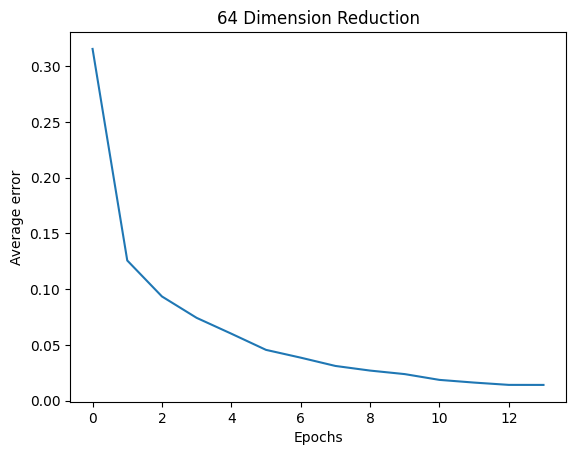

119/119 [==============================] - 0s 3ms/step
tf.Tensor(
[[747   0   9   3   0   0   0   0]
 [  1 750   4   3   0   0   0   1]
 [  4   3 739   6   0   0   0   7]
 [  4   1  22 727   0   0   0   5]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  2   3  12   2   0   0   0 740]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 128 

Epoch 1/10000
11385/11385 [==============================] - 47s 4ms/step - loss: 0.3328 - accuracy: 0.9241
Epoch 2/10000
11385/11385 [==============================] - 42s 4ms/step - loss: 0.1158 - accuracy: 0.9690
Epoch 3/10000
11385/11385 [==============================] - 41s 4ms/step - loss: 0.0850 - accuracy: 0.9762
Epoch 4/10000
11385/11385 [==============================] - 42s 4ms/step - loss: 0.0643 - accuracy: 0.9806
Epoch 5/10000
11385/11385 [==============================] - 40s 4ms/step - loss: 0.0491 - accuracy: 0.9869
Epoch 6/10000
11385/11385 [=============================

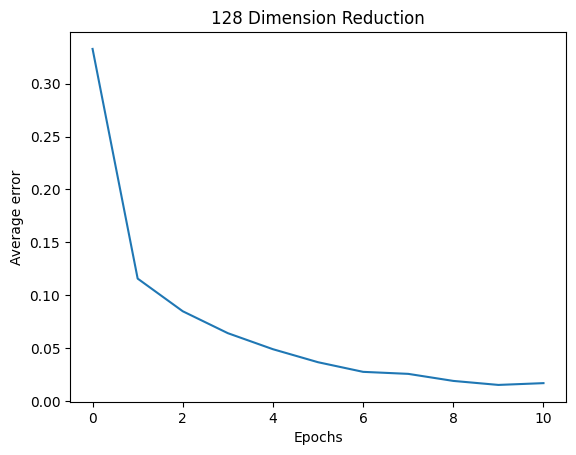

119/119 [==============================] - 1s 3ms/step
tf.Tensor(
[[748   0   6   3   0   0   0   2]
 [  1 743   7   2   0   0   0   6]
 [  5   3 738   7   0   0   0   6]
 [  5   5  11 734   0   0   0   4]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  2   2   9   5   0   0   0 741]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 256 

Epoch 1/10000
11385/11385 [==============================] - 48s 4ms/step - loss: 0.2903 - accuracy: 0.9366
Epoch 2/10000
11385/11385 [==============================] - 46s 4ms/step - loss: 0.1069 - accuracy: 0.9708
Epoch 3/10000
11385/11385 [==============================] - 45s 4ms/step - loss: 0.0790 - accuracy: 0.9778
Epoch 4/10000
11385/11385 [==============================] - 15131s 1s/step - loss: 0.0564 - accuracy: 0.9834
Epoch 5/10000
11385/11385 [==============================] - 22s 2ms/step - loss: 0.0370 - accuracy: 0.9888
Epoch 6/10000
11385/11385 [===========================

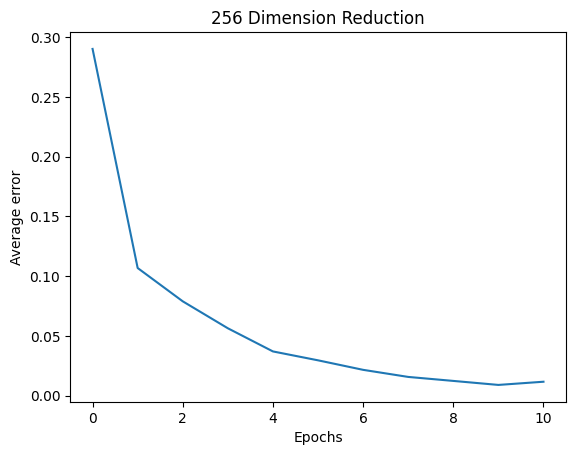

119/119 [==============================] - 0s 2ms/step
tf.Tensor(
[[749   0   5   4   0   0   0   1]
 [  1 749   2   2   0   0   0   5]
 [ 10   6 724  14   0   0   0   5]
 [  5   5  12 734   0   0   0   3]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  5   5   8  12   0   0   0 729]], shape=(8, 8), dtype=int32)


In [8]:
for i in [32,64,128,256]:
    PCA_Analysis(i,32,16,8)



Dimensions Reduced to 32 

Epoch 1/10000
11385/11385 [==============================] - 27s 2ms/step - loss: 0.2283 - accuracy: 0.9384
Epoch 2/10000
11385/11385 [==============================] - 19s 2ms/step - loss: 0.1335 - accuracy: 0.9603
Epoch 3/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0996 - accuracy: 0.9705
Epoch 4/10000
11385/11385 [==============================] - 17s 1ms/step - loss: 0.0786 - accuracy: 0.9765
Epoch 5/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0623 - accuracy: 0.9821
Epoch 6/10000
11385/11385 [==============================] - 24s 2ms/step - loss: 0.0506 - accuracy: 0.9840
Epoch 7/10000
11385/11385 [==============================] - 18s 2ms/step - loss: 0.0418 - accuracy: 0.9878
Epoch 8/10000
11385/11385 [==============================] - 18s 2ms/step - loss: 0.0375 - accuracy: 0.9874
Epoch 9/10000
11385/11385 [==============================] - 21s 2ms/step - loss: 0.0307 - accuracy: 0.9908


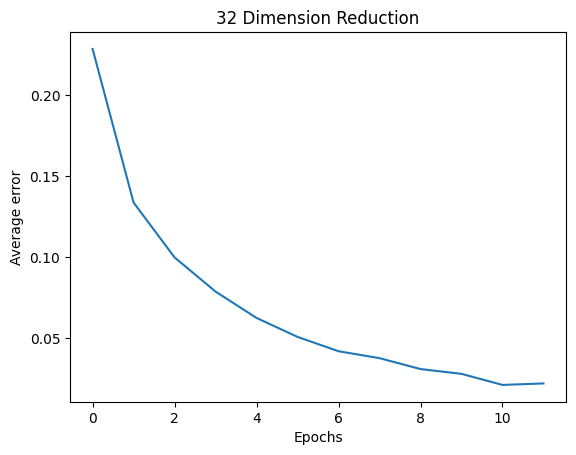

119/119 [==============================] - 0s 1ms/step
tf.Tensor(
[[740   0  12   3   0   0   0   4]
 [  0 751   4   3   0   0   0   1]
 [  4   2 738   8   0   0   0   7]
 [  7   1   6 741   0   0   0   4]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   5  14   4   0   0   0 736]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 64 

Epoch 1/10000
11385/11385 [==============================] - 17s 1ms/step - loss: 0.2150 - accuracy: 0.9417
Epoch 2/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.1190 - accuracy: 0.9646
Epoch 3/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0920 - accuracy: 0.9724
Epoch 4/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0666 - accuracy: 0.9807
Epoch 5/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0542 - accuracy: 0.9834
Epoch 6/10000
11385/11385 [==============================

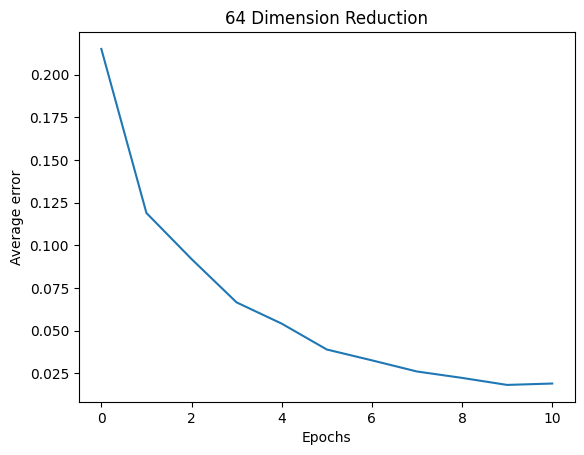

119/119 [==============================] - 0s 2ms/step
tf.Tensor(
[[750   0   6   1   0   0   0   2]
 [  0 753   3   0   0   0   0   3]
 [  5   1 730  13   0   0   0  10]
 [  3   4  12 733   0   0   0   7]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  1   5   6   6   0   0   0 741]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 128 

Epoch 1/10000
11385/11385 [==============================] - 17s 1ms/step - loss: 0.2201 - accuracy: 0.9428
Epoch 2/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.1260 - accuracy: 0.9641
Epoch 3/10000
11385/11385 [==============================] - 19s 2ms/step - loss: 0.0903 - accuracy: 0.9740
Epoch 4/10000
11385/11385 [==============================] - 16s 1ms/step - loss: 0.0656 - accuracy: 0.9798
Epoch 5/10000
11385/11385 [==============================] - 25s 2ms/step - loss: 0.0465 - accuracy: 0.9874
Epoch 6/10000
11385/11385 [=============================

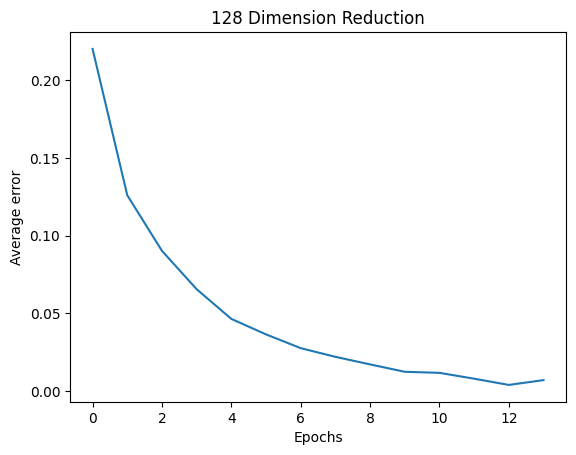

119/119 [==============================] - 0s 1ms/step
tf.Tensor(
[[752   0   2   2   0   0   0   3]
 [  0 750   4   3   0   0   0   2]
 [  7   2 737   7   0   0   0   6]
 [  3   5  12 736   0   0   0   3]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  1   7  12   5   0   0   0 734]], shape=(8, 8), dtype=int32)

Dimensions Reduced to 256 

Epoch 1/10000
11385/11385 [==============================] - 25s 2ms/step - loss: 0.2231 - accuracy: 0.9415
Epoch 2/10000
11385/11385 [==============================] - 34s 3ms/step - loss: 0.1132 - accuracy: 0.9664
Epoch 3/10000
11385/11385 [==============================] - 37s 3ms/step - loss: 0.0786 - accuracy: 0.9773
Epoch 4/10000
11385/11385 [==============================] - 35s 3ms/step - loss: 0.0550 - accuracy: 0.9836
Epoch 5/10000
11385/11385 [==============================] - 33s 3ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 6/10000
11385/11385 [=============================

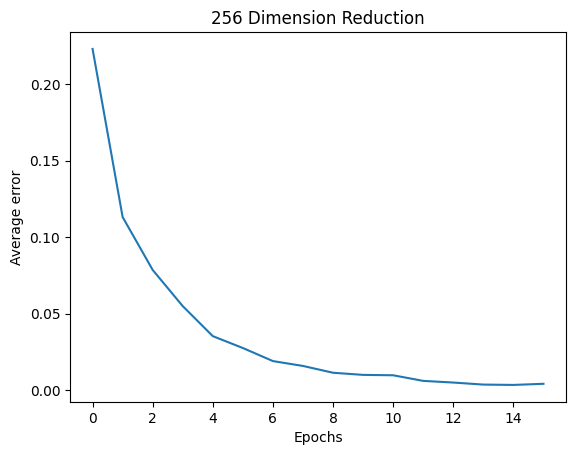

119/119 [==============================] - 0s 2ms/step
tf.Tensor(
[[751   0   4   3   0   0   0   1]
 [  0 752   3   1   0   0   0   3]
 [  8   5 729  12   0   0   0   5]
 [  5   4  10 731   0   0   0   9]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  3   3   8   4   0   0   0 741]], shape=(8, 8), dtype=int32)


In [9]:
for i in [32,64,128,256]:
    PCA_Analysis(i,128,64,32)
